# BootstrapOutOfBag

An implementation of the out-of-bag bootstrap to evaluate supervised learning algorithms.

> `from mlxtend.evaluate import BootstrapOutOfBag`    

## Overview

Originally, the bootstrap method aims to determine the statistical properties of an estimator when the underlying distribution was unknown and additional samples are not available. Now, in order to exploit this method for the evaluation of predictive models, such as hypotheses for classification and regression, we may prefer a slightly different approach to bootstrapping using the so-called Out-Of-Bag (OOB) or Leave-One-Out Bootstrap (LOOB) technique. Here, we use out-of-bag samples as test sets for evaluation instead of evaluating the model on the training data. Out-of-bag samples are the unique sets of instances that are not used for model fitting as shown in the figure below [1].


![](BootstrapOutOfBag_files/bootrap_concept.png)


The figure above illustrates how three random bootstrap samples drawn from an exemplary ten-sample dataset ($X_1,X_2, ..., X_{10}$) and their out-of-bag sample for testing may look like. In practice, Bradley Efron and Robert Tibshirani recommend drawing 50 to 200 bootstrap samples as being sufficient for reliable estimates [2].

### References

- [1]  https://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html
- [2] Efron, Bradley, and Robert J. Tibshirani. An introduction to the bootstrap. CRC press, 1994. Management of Data (ACM SIGMOD '97), pages 265-276, 1997.

## Example 1 -- Evaluating the predictive performance of a model

The `BootstrapOutOfBag` class mimics the behavior of scikit-learn's cross-validation classes, e.g., `KFold`:

In [1]:
from mlxtend.evaluate import BootstrapOutOfBag
import numpy as np


oob = BootstrapOutOfBag(n_splits=3)
for train, test in oob.split(np.array([1, 2, 3, 4, 5])):
    print(train, test)

[0 4 4 3 3] [1 2]
[1 1 1 0 3] [2 4]
[4 2 1 4 0] [3]


Consequently, we can use `BootstrapOutOfBag` objects via the `cross_val_score` method:

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target
lr = LogisticRegression()

print(cross_val_score(lr, X, y))

[ 0.96078431  0.92156863  0.95833333]


In [3]:
print(cross_val_score(lr, X, y, cv=BootstrapOutOfBag(n_splits=3, random_seed=456)))

[ 0.92727273  0.96226415  0.94444444]


In practice, it is recommended to run at least 200 iterations, though:

In [4]:
print('Mean accuracy: %.1f%%' % np.mean(100*cross_val_score(
    lr, X, y, cv=BootstrapOutOfBag(n_splits=200, random_seed=456))))

Mean accuracy: 94.8%


Using the bootstrap, we can use the percentile method to compute the confidence bounds of the performance estimate. We pick our lower and upper confidence bounds as follows:

- $ACC_{lower}$ = $\alpha_1th$ percentile of the $ACC_{boot}$ distribution
- $ACC_{lower}$ = $\alpha_2th$ percentile of the $ACC_{boot}$ distribution

where $\alpha_1 = \alpha$ and $\alpha_2 = 1-\alpha$, and the degree of confidence to compute the $100 \times (1-2 \times \alpha)$ confidence interval. For instance, to compute a 95% confidence interval, we pick $\alpha=0.025$ to obtain the 2.5th and 97.5th percentiles of the *b* bootstrap samples distribution as the upper and lower confidence bounds.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

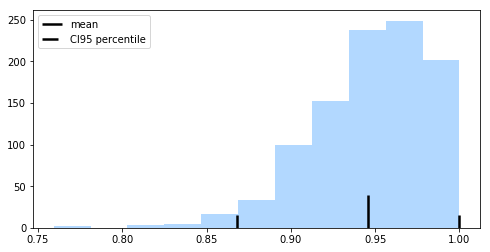

In [6]:
accuracies = cross_val_score(lr, X, y, cv=BootstrapOutOfBag(n_splits=1000, random_seed=456))
mean = np.mean(accuracies)

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 40, lw=2.5, linestyle='-', label='mean')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.hist(accuracies, bins=11,
        color='#0080ff', edgecolor="none", 
        alpha=0.3)
plt.legend(loc='upper left')



plt.show()

## API

In [7]:
with open('../../api_modules/mlxtend.evaluate/BootstrapOutOfBag.md', 'r') as f:
    s = f.read() 
print(s)

## BootstrapOutOfBag

*BootstrapOutOfBag(n_splits=200, random_seed=None)*

**Parameters**


- `n_splits` : int (default=200)

    Number of bootstrap iterations.
    Must be larger than 1.


- `random_seed` : int (default=None)

    If int, random_seed is the seed used by
    the random number generator.


**Returns**

- `train_idx` : ndarray

    The training set indices for that split.


- `test_idx` : ndarray

    The testing set indices for that split.


**Examples**

>>> raise ValueError('test')

### Methods

<hr>

*get_n_splits(X=None, y=None, groups=None)*

Returns the number of splitting iterations in the cross-validator

**Parameters**

- `X` : object

    Always ignored, exists for compatibility with scikit-learn.


- `y` : object

    Always ignored, exists for compatibility with scikit-learn.


- `groups` : object

    Always ignored, exists for compatibility with scikit-learn.

**Returns**


- `n_splits` : int

    Returns the number of splitting iterations in the cross-va